In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

#plotly library

from chart_studio import plotly
from plotly.offline import init_notebook_mode ,iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#word cloud
from wordcloud import WordCloud



In [3]:
# pip install chart-studio


In [4]:
winemag130_data = pd.read_csv("winemag-data-130k-v2.csv")
winemag130_data.rename( columns={'Unnamed: 0':'ID'}, inplace=True )



In [5]:
winemag130_data

,ID,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [6]:
winemag130_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [7]:
winemag130_data.head(10)


,ID,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


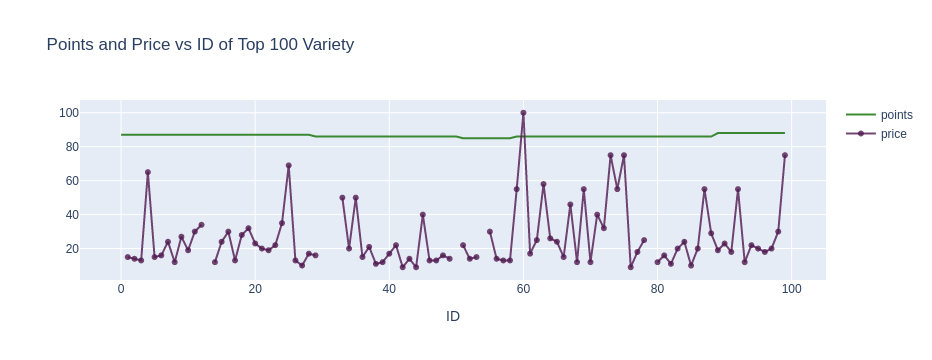

In [8]:
#Plotly line Plot

df = winemag130_data.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.ID,
                    y = df.points,
                    mode = "lines",
                    name = "points",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.variety)
# Creating trace2
trace2 = go.Scatter(
                    x = df.ID,
                    y = df.price,
                    mode = "lines+markers",
                    name = "price",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.variety)
data = [trace1, trace2]
layout = dict(title = 'Points and Price vs ID of Top 100 Variety',
              xaxis= dict(title= 'ID',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [9]:
winemag130_data["points"].unique()


array([ 87,  86,  85,  88,  92,  91,  90,  89,  83,  82,  81,  80, 100,
        98,  97,  96,  95,  93,  94,  84,  99])

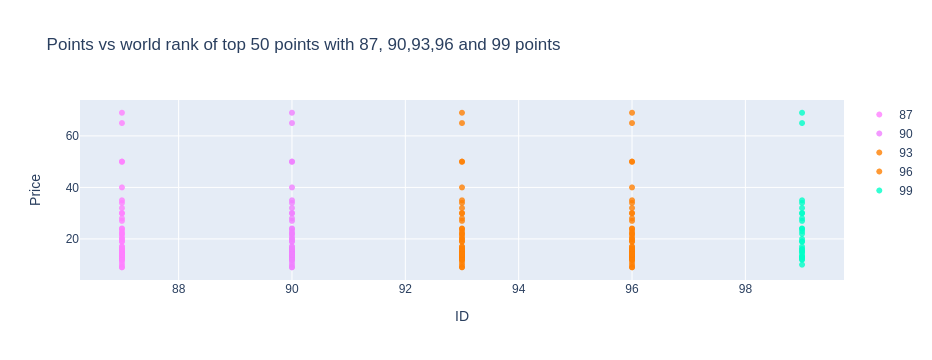

In [10]:
#Plotly scatter plot

df87 = winemag130_data[winemag130_data.points == 87].iloc[:50,:]
df90 = winemag130_data[winemag130_data.points == 90].iloc[:50,:]
df93 = winemag130_data[winemag130_data.points == 93].iloc[:50,:]
df96 = winemag130_data[winemag130_data.points == 96].iloc[:50,:]
df99 = winemag130_data[winemag130_data.points == 99].iloc[:50,:]

df = winemag130_data.iloc[:100,:]

import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df87.points,
                    y = df.price,
                    mode = "markers",
                    name = "87",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df87.variety)
# creating trace2
trace2 =go.Scatter(
                    x = df90.points,
                    y = df.price,
                    mode = "markers",
                    name = "90",
                    marker = dict(color = 'rgba(240, 128, 255, 0.8)'),
                    text= df90.variety)
# creating trace3
trace3 =go.Scatter(
                    x = df93.points,
                    y = df.price,
                    mode = "markers",
                    name = "93",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df90.variety)
# creating trace4
trace4 =go.Scatter(
                    x = df96.points,
                    y = df.price,
                    mode = "markers",
                    name = "96",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df96.variety)
# creating trace5
trace5 =go.Scatter(
                    x = df99.points,
                    y = df.price,
                    mode = "markers",
                    name = "99",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df99.variety)
data = [trace1, trace2, trace3,trace4,trace5]
layout = dict(title = 'Points vs world rank of top 50 points with 87, 90,93,96 and 99 points',
              xaxis= dict(title= 'ID',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

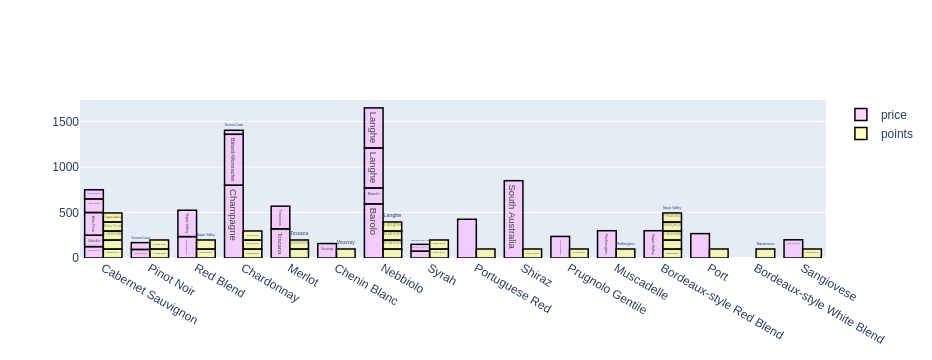

In [11]:
#plotly bar plot

df99 = winemag130_data[winemag130_data.points == 99].iloc[:50,:]

import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df99.variety,
                y = df99.price,
                name = "price",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df99.region_1)
# create trace2 
trace2 = go.Bar(
                x = df99.variety,
                y = df99.points,
                name = "points",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df99.region_1)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [12]:
#Plotly bar plot

df87 = winemag130_data[winemag130_data.points == 87].iloc[:10,:]

import plotly.graph_objs as go

x = df87.variety

trace1 = {
  'x': x,
  'y': df87.price,
  'name': 'price',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df87.points,
  'name': 'points',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',
  'title': 'price and points of top 10 variety in 87'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)


In [13]:
#plotly pie plot

df87 = winemag130_data[winemag130_data.points == 87].iloc[1:8,:]

value=df87.price
labels=df87.title

fig = {
  "data": [
    {
      "values": value,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Wine names by price",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Wine names by price",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Wine Reviews Title",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [14]:
df87 = winemag130_data[winemag130_data.points == 87].iloc[1:21,:]
df87.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20 non-null     int64  
 1   country                20 non-null     object 
 2   description            20 non-null     object 
 3   designation            14 non-null     object 
 4   points                 20 non-null     int64  
 5   price                  19 non-null     float64
 6   province               20 non-null     object 
 7   region_1               17 non-null     object 
 8   region_2               5 non-null      object 
 9   taster_name            20 non-null     object 
 10  taster_twitter_handle  15 non-null     object 
 11  title                  20 non-null     object 
 12  variety                20 non-null     object 
 13  winery                 20 non-null     object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.3+ KB


In [15]:
#plotly bubble plot

df87 = winemag130_data[winemag130_data.points == 87].iloc[1:21,:]

df=df87.fillna(0)

color=df.price

data = [
    {
        'y': df.price,
        'x': df.ID,
        'mode': 'markers',
        'marker': {
            'color': color,
            'size': color,
            'showscale': True
        },
        "text" :  df.variety    
    }
]
iplot(data)

In [16]:
winemag150_data = pd.read_csv("winemag-data_first150k.csv")
winemag150_data.rename( columns={'Unnamed: 0':'ID'}, inplace=True )


In [17]:
winemag150_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [18]:
winemag150_data.head()


,ID,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [19]:
winemag150_data["points"].unique()


array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  81, 100,  99,  98,  97,  80])

In [20]:
#plotly histograms plot

df96 = winemag130_data[winemag130_data.points == 96].iloc[:50,:]
df100 = winemag130_data[winemag130_data.points == 100].iloc[:50,:]

import plotly.graph_objs as go

trace1 = go.Histogram(
    x=df96.price,
    opacity=0.75,
    name = "96 points",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=df100.price,
    opacity=0.75,
    name = "100 points",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Wine Reviews price in 96 and 100 points',
                   xaxis=dict(title='price'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [21]:
#plotly cumulative histograms plot

df87 = winemag130_data[winemag130_data.points == 87].iloc[:100,:]

import plotly.graph_objs as go



trace2 = go.Histogram(
    x=df87.price,
    cumulative=dict(enabled=True))

data = [trace2]
layout = go.Layout(barmode='overlay',
                   title=' Wine Reviews price in 87 points',
                   xaxis=dict(title='price'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


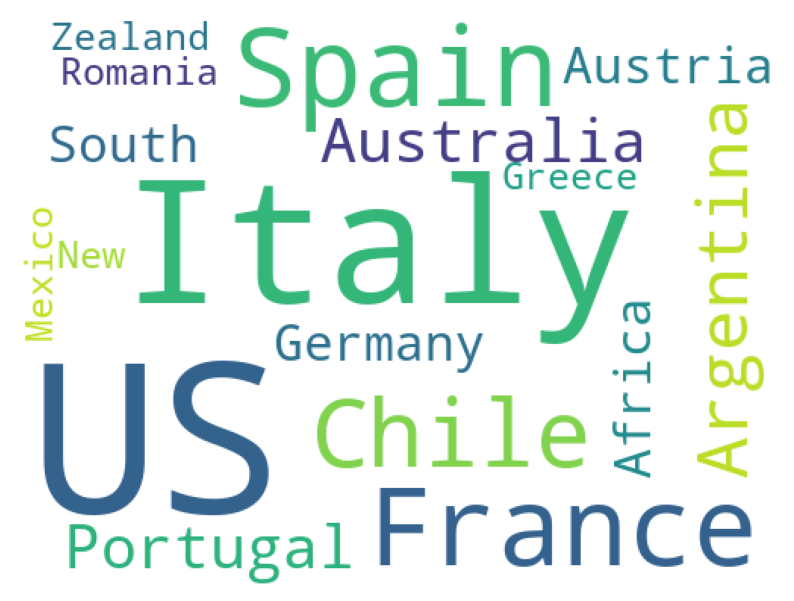

In [22]:
#WorldCloud

df87 = winemag130_data[winemag130_data.points == 87].iloc[:160,:]
df87_new=df87.country[df87.points==87]

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df87_new))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [23]:
#plotly box plot

df99 = winemag130_data[winemag130_data.points == 99].iloc[:100,:]

df100 = winemag130_data[winemag130_data.points == 100].iloc[:100,:]

trace0 = go.Box(
    y=df99.price,
    name = 'total score of price in 99',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=df100.price,
    name = 'research of price in 100',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)

data = [trace0, trace1]
iplot(data)

In [24]:
#Plotly inset plot

df100=winemag150_data[winemag150_data.points == 100]

trace1 = go.Scatter(
    x=df100.ID,
    y=df100.price,
    name = "price",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=df100.ID,
    y=df100.points,
    xaxis='x2',
    yaxis='y2',
    name = "points",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Points and Price vs ID of Wine Reviews'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# winemag150_data

In [25]:
#plotly 3D scatter plot

df99=winemag150_data[winemag150_data.points == 99]
df100=winemag150_data[winemag150_data.points == 100]

trace1 = go.Scatter3d(
    x=df99.ID,
    y=df99.price,
    z=df99.points,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255, 0, 0)',                # set color to an array/list of desired values      
    )
)
trace2 = go.Scatter3d(
    x=df100.ID,
    y=df100.price,
    z=df100.points,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(127, 127, 127)',                # set color to an array/list of desired values      
    )
)

data = [trace1,trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)